<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/11-support-vector-machines/01_linear_classification_with_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear classification with SVM

##Setup

In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

random.seed(0)

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_11_Support_Vector_Machines/utils.py

In [4]:
import utils

In [5]:
# Some functions to plot our points and draw the models
def plot_points(features, labels):
  X = np.array(features)
  y = np.array(labels)
  spam = X[np.argwhere(y==1)]
  ham = X[np.argwhere(y==0)]
  plt.scatter([s[0][0] for s in spam],
              [s[0][1] for s in spam],
              s = 25,
              color = 'cyan',
              edgecolor = 'k',
              marker = '^')
  plt.scatter([s[0][0] for s in ham],
              [s[0][1] for s in ham],
              s = 25,
              color = 'red',
              edgecolor = 'k',
              marker = 's')

Ref: https://www.kaggle.com/product-feedback/158412

In [ ]:
!pip install six

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from six import StringIO
import utils

##Building linear dataset

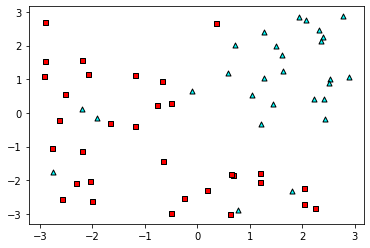

In [7]:
rows = []

# Adding points
for i in range(50):
  x = 6 * random.random() - 3
  y = 6 * random.random() - 3

  z = int(x + y > 0.5)
  rows.append([x, y, z])

# Adding noise
for i in range(10):
  x = 6 * random.random() - 3
  y = 6 * random.random() - 3

  z = random.randint(0, 1)
  rows.append([x, y, z])

data_df = pd.DataFrame(rows, columns=["x_1", "x_2", "y"])
plot_points(data_df[["x_1", "x_2"]], data_df["y"])

In [8]:
# creating feature and label set 
features = np.array(data_df[["x_1", "x_2"]])
labels = np.array(data_df["y"])

##SVM Linear model

In [9]:
svm_linear = SVC(kernel="linear")
svm_linear.fit(features, labels)

SVC(kernel='linear')

In [10]:
print(f"Accuracy: {svm_linear.score(features, labels)}")

Accuracy: 0.8833333333333333


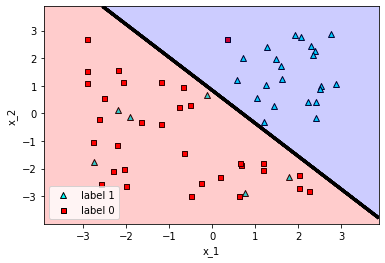

In [12]:
utils.plot_model(features, labels, svm_linear)

Let's try with the `C` parameter into the model, one with a very small value of 0.01, and another one with a large value of 100.

In [13]:
svm_c_001 = SVC(kernel="linear", C=0.01)
svm_c_001.fit(features, labels)

SVC(C=0.01, kernel='linear')

C = 0.01
Accuracy: 0.8833333333333333


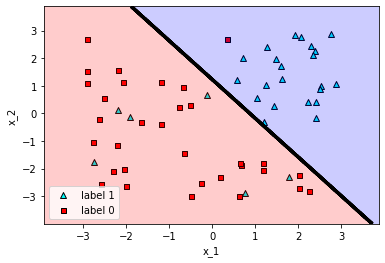

In [18]:
print("C = 0.01")
print(f"Accuracy: {svm_c_001.score(features, labels)}")
utils.plot_model(features, labels, svm_c_001)

In [15]:
svm_c_100 = SVC(kernel="linear", C=100)
svm_c_100.fit(features, labels)

SVC(C=100, kernel='linear')

C = 100
Accuracy: 0.8833333333333333


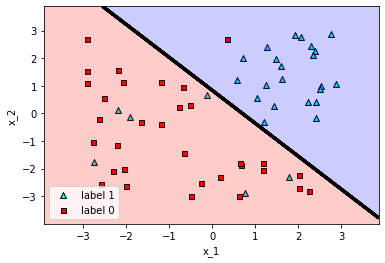

In [17]:
print("C = 100")
print(f"Accuracy: {svm_c_100.score(features, labels)}")
utils.plot_model(features, labels, svm_c_100)

We can see that the model with a small value of C doesn’t put that much emphasis on classifying
the points correctly, and it makes some mistakes, as is evident in its low accuracy (0.867).

It is
hard to tell in this example, but this classifier puts a lot of emphasis on the line being as far away
from the points as possible. 

In contrast, the classifier with the large value of C tries to classify all
the points correctly, which reflects on its higher accuracy.